## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `5_cdf_dce_groups` 
### Cumulative distribution function (CDF) figures for dce groups. 

Notebook contents 
* CDFs by DCE

created by Cassie Lumbrazo\
last updated: Oct 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

## Constants and Calculations to Run before any other sections

In [4]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [6]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [7]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

Now, check this for the sensitivity for each side of the ridge 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


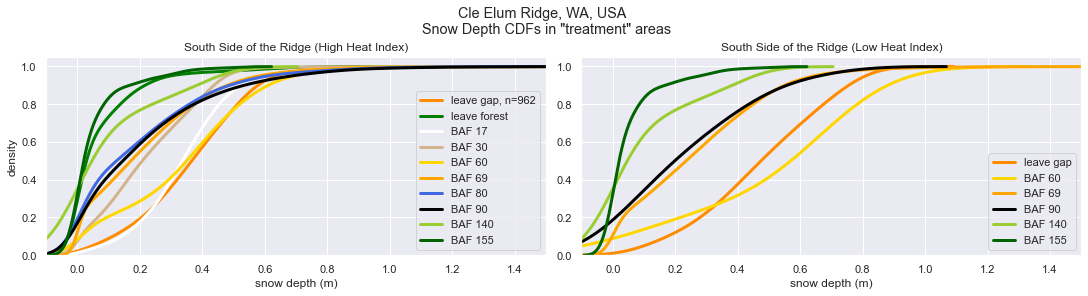

In [9]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

## Changing DCE Group Sizes

Let's look at the heat index sensitivtiy of each side of the ridge.

## Doing adjustments to the edges, small gaps, and large gaps to find sensitvity 

In [10]:
dce_reclass = ds['dce_rapid'].copy(deep=True) # where cond = False, replace (unless we use the ~)  

# previously was 3m with Giulia, tried 5m, and now trying 7m, 8m, then 10m    
num_max = 8            
num_mid = 2            

dce_reclass = dce_reclass.where(~(( num_max <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps     5 <  DCE <=  20
dce_reclass = dce_reclass.where(~(( num_mid <  dce_reclass) & (dce_reclass <=  num_max)), 400) # group 2: Small Gaps      1 <  DCE <=  5
dce_reclass = dce_reclass.where(~((-num_mid <= dce_reclass) & (dce_reclass <=  num_mid)), 300) # group 5: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-num_max <= dce_reclass) & (dce_reclass <  -num_mid)), 200) # group 4: Small Clusters -5 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-num_max), 100)                           # group 5: Large Clusters       DCE <= -5

ds['dce_rapid_reclass_2'] = dce_reclass.copy(deep=True)

# first define the hs for each dce group
ds['hs_dce_rapid_reclass_2_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 100) # forest
ds['hs_dce_rapid_reclass_2_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 200)
ds['hs_dce_rapid_reclass_2_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 300)
ds['hs_dce_rapid_reclass_2_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 400)
ds['hs_dce_rapid_reclass_2_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_2_100_n'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] == -1) #baf_ridge
ds['hs_dce_rapid_reclass_2_200_n'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_300_n'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_400_n'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_500_n'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_2_100_s'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_2_100_n_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] == -1) #dah_binary
ds['hs_dce_rapid_reclass_2_200_n_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_300_n_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_400_n_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_500_n_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_2_100_s_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] ==  1)

Do the same for ncalm to plot later....

In [17]:
ds['dce_ncalm'] = ds['dce_ncalm'] / 0.3048 # TEMPORARY FIXING THE UNIT
dce_reclass = ds['dce_ncalm'].copy(deep=True) # where cond = False, replace (unless we use the ~)  

# previously was 3m with Giulia, tried 5m, and now trying 7m, 8m, then 10m    
num_max = 8            
num_mid = 2            

dce_reclass = dce_reclass.where(~(( num_max <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps     5 <  DCE <=  20
dce_reclass = dce_reclass.where(~(( num_mid <  dce_reclass) & (dce_reclass <=  num_max)), 400) # group 2: Small Gaps      1 <  DCE <=  5
dce_reclass = dce_reclass.where(~((-num_mid <= dce_reclass) & (dce_reclass <=  num_mid)), 300) # group 5: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-num_max <= dce_reclass) & (dce_reclass <  -num_mid)), 200) # group 4: Small Clusters -5 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-num_max), 100)                           # group 5: Large Clusters       DCE <= -5

ds['dce_ncalm_reclass_2'] = dce_reclass.copy(deep=True)

# first define the hs for each dce group
ds['hs_dce_ncalm_reclass_2_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 100) # forest
ds['hs_dce_ncalm_reclass_2_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 200)
ds['hs_dce_ncalm_reclass_2_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 300)
ds['hs_dce_ncalm_reclass_2_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 400)
ds['hs_dce_ncalm_reclass_2_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_ncalm_reclass_2_100_n'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['baf_ridge'] == -1) #baf_ridge
ds['hs_dce_ncalm_reclass_2_200_n'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_300_n'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_400_n'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_500_n'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_ncalm_reclass_2_100_s'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_200_s'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_300_s'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_400_s'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_500_s'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_ncalm_reclass_2_100_n_dah'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['dah_binary'] == -1) #dah_binary
ds['hs_dce_ncalm_reclass_2_200_n_dah'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_300_n_dah'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_400_n_dah'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_500_n_dah'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_ncalm_reclass_2_100_s_dah'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_200_s_dah'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_300_s_dah'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_400_s_dah'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_500_s_dah'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['dah_binary'] ==  1)

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_10136\1698479073.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


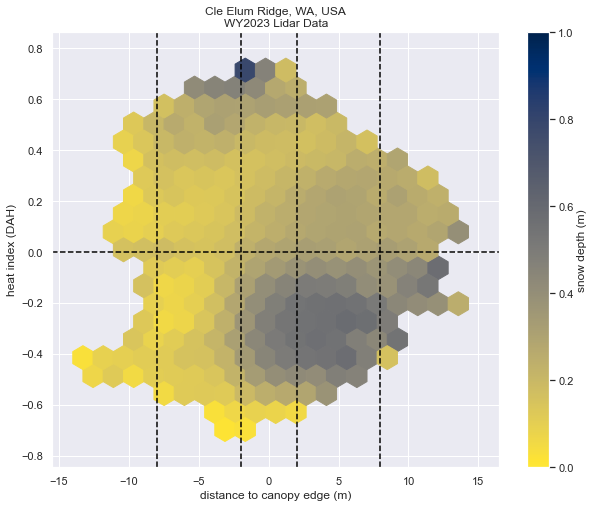

In [11]:
plt.figure(figsize=(10,8))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

# add verticle and horizontal lines to this plot 
plt.axhline(y=0, color='black', linestyle='--') # head index binary line

plt.axvline(x=num_max, color='black', linestyle='--')
plt.axvline(x=num_mid, color='black', linestyle='--')

plt.axvline(x=-num_mid, color='black', linestyle='--')
plt.axvline(x=-num_max, color='black', linestyle='--')


cb = plt.colorbar()
cb.set_label('snow depth (m)')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index (DAH)')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nWY2023 Lidar Data')
plt.show()

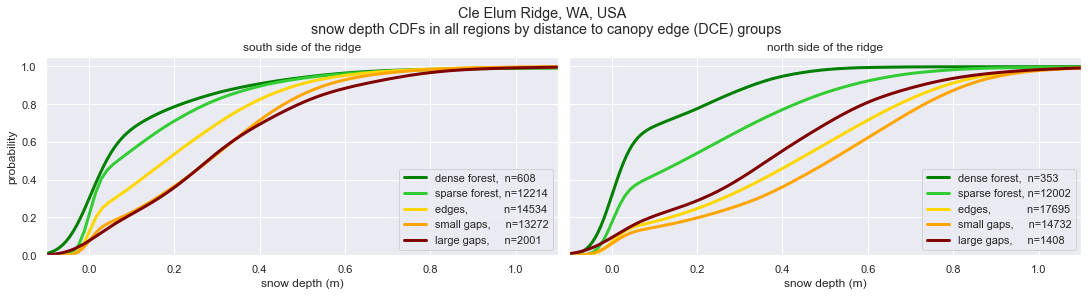

In [12]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.1)

plt.suptitle('Cle Elum Ridge, WA, USA \n snow depth CDFs in all regions by distance to canopy edge (DCE) groups')
axes[0].legend()
axes[1].legend()

plt.show()

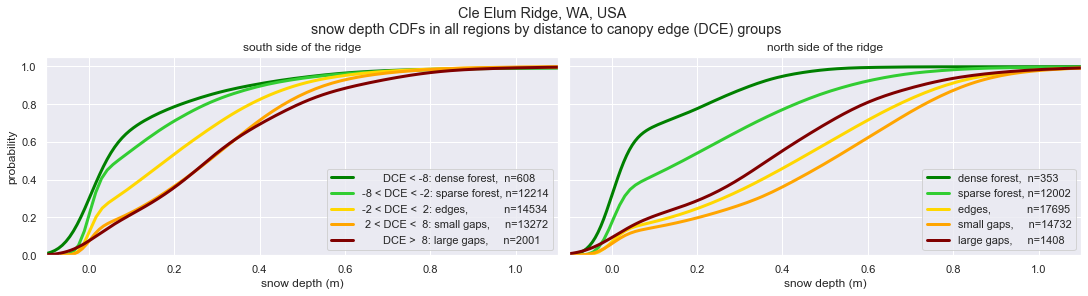

In [13]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.1)

plt.suptitle('Cle Elum Ridge, WA, USA \n snow depth CDFs in all regions by distance to canopy edge (DCE) groups')
axes[0].legend()
axes[1].legend()

plt.show()

Make the same plot for ncalm...

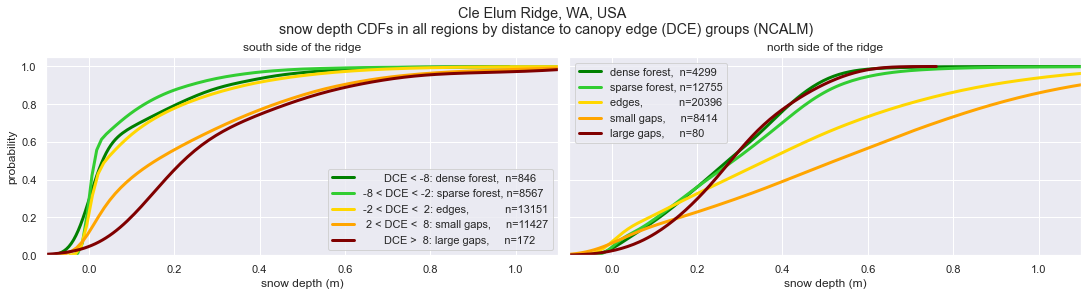

In [18]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.1)

plt.suptitle('Cle Elum Ridge, WA, USA \n snow depth CDFs in all regions by distance to canopy edge (DCE) groups (NCALM)')
axes[0].legend()
axes[1].legend()

plt.show()

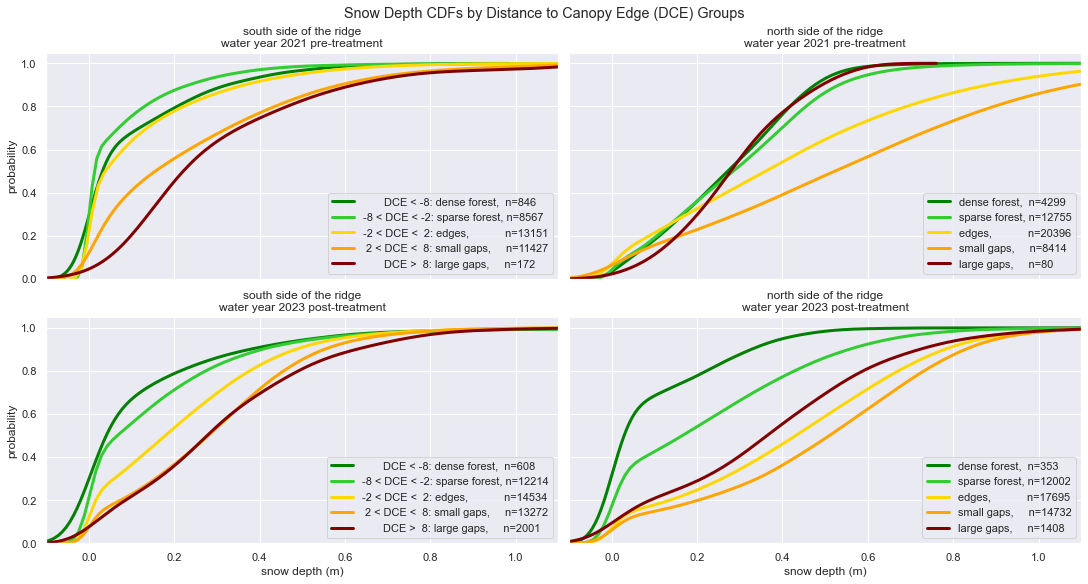

In [25]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_s'].values.flatten(), ax=axes[0,0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_s'].values.flatten(), ax=axes[0,0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_s'].values.flatten(), ax=axes[0,0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_s'].values.flatten(), ax=axes[0,0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_s'].values.flatten(), ax=axes[0,0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_n'].values.flatten(), ax=axes[0,1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_n'].values.flatten(), ax=axes[0,1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_n'].values.flatten(), ax=axes[0,1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_n'].values.flatten(), ax=axes[0,1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_n'].values.flatten(), ax=axes[0,1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].values.flatten(), ax=axes[1,0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].values.flatten(), ax=axes[1,0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].values.flatten(), ax=axes[1,0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].values.flatten(), ax=axes[1,0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].values.flatten(), ax=axes[1,0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].values.flatten(), ax=axes[1,1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].values.flatten(), ax=axes[1,1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].values.flatten(), ax=axes[1,1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].values.flatten(), ax=axes[1,1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].values.flatten(), ax=axes[1,1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0,0].set_title('south side of the ridge\nwater year 2021 pre-treatment')
axes[0,1].set_title('north side of the ridge\nwater year 2021 pre-treatment')
axes[1,0].set_title('south side of the ridge\nwater year 2023 post-treatment')
axes[1,1].set_title('north side of the ridge\nwater year 2023 post-treatment')

axes[1,0].set_xlabel('snow depth (m)')
axes[1,1].set_xlabel('snow depth (m)')

axes[0,0].set_ylabel('probability')
axes[1,0].set_ylabel('probability')

axes[0,0].set_xlim(-0.1,1.1)

plt.suptitle('Snow Depth CDFs by Distance to Canopy Edge (DCE) Groups')
axes[0,0].legend(loc='lower right')
axes[0,1].legend(loc='lower right')
axes[1,0].legend(loc='lower right')
axes[1,1].legend(loc='lower right')

# define path to save the figures to
figure_path = "C:\\Users\\Lumbr\\OneDrive - UW\\Documents - mountainhydro\\People\\CassieLumbrazo\\EasternCascades\\Writing\\5_Manuscript\\2_PostDefense\\python_figures\\"
# export the figure with high resolution
figure_name = 'cdf_dce_groups_preandpost.png'
plt.savefig(figure_path + figure_name, dpi=800)

plt.show()

## I edited the code above for a figure, now below is the rest of the code in the notebook....

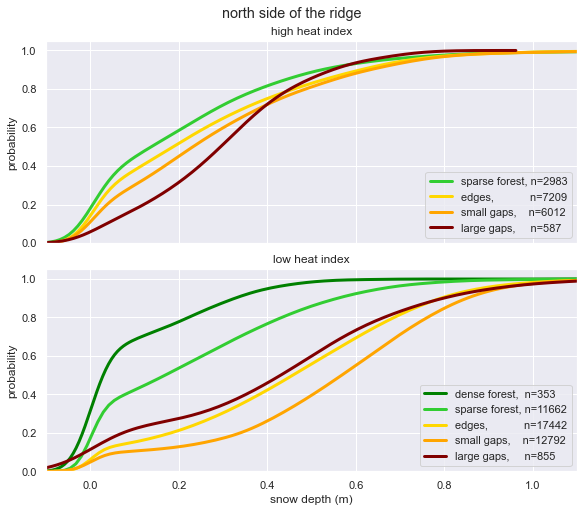

In [14]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,7), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('north side of the ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('high heat index')
axes[1].set_title('low heat index')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('probability')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')

axes[0].set_xlim(-0.1,1.1)
plt.show()

Let's look at the heat index sensitivtiy of each side of the ridge.

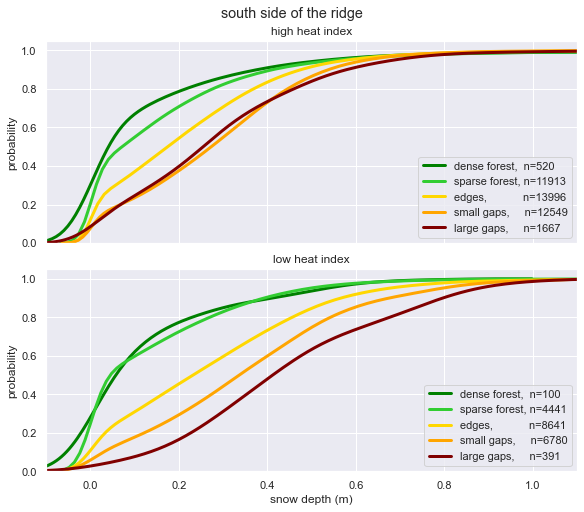

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,7), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('south side of the ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('high heat index')
axes[1].set_title('low heat index')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('probability')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
axes[0].set_xlim(-0.1,1.1)

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_20132\1029302816.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


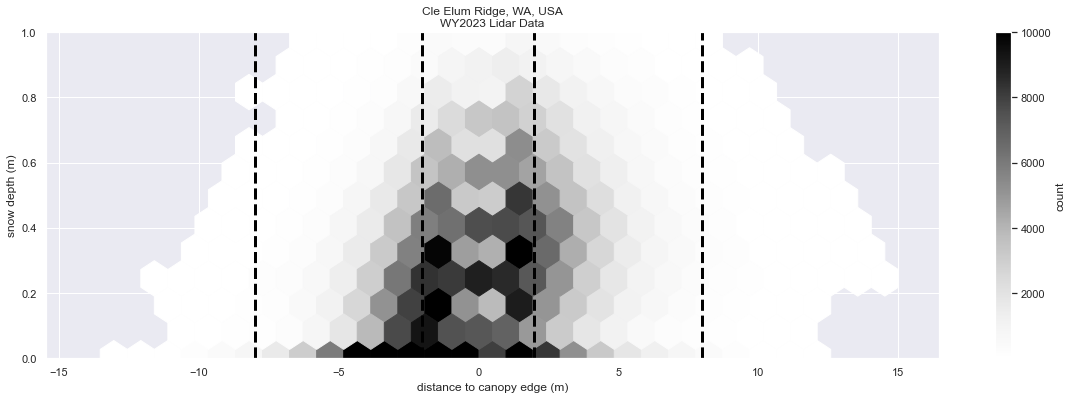

In [16]:
plt.figure(figsize=(20,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['hs_rapid'].values.flatten(), gridsize=30, mincnt=10, cmap='Greys',
            vmax=10000,
          #C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          )

cb = plt.colorbar()
cb.set_label('count')

# add verticle and horizontal lines to this plot 
# plt.axhline(y=0, color='black', linestyle='--') # head index binary line

plt.axvline(x=8, color='black', linestyle='--', linewidth=3)
plt.axvline(x=2, color='black', linestyle='--', linewidth=3)

plt.axvline(x=-8, color='black', linestyle='--', linewidth=3)
plt.axvline(x=-2, color='black', linestyle='--', linewidth=3)

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('snow depth (m)')
# plt.xlim([-10,10])
plt.ylim([0, 1])


plt.title('Cle Elum Ridge, WA, USA\nWY2023 Lidar Data')
plt.show()

## DCE CDFs with all sites

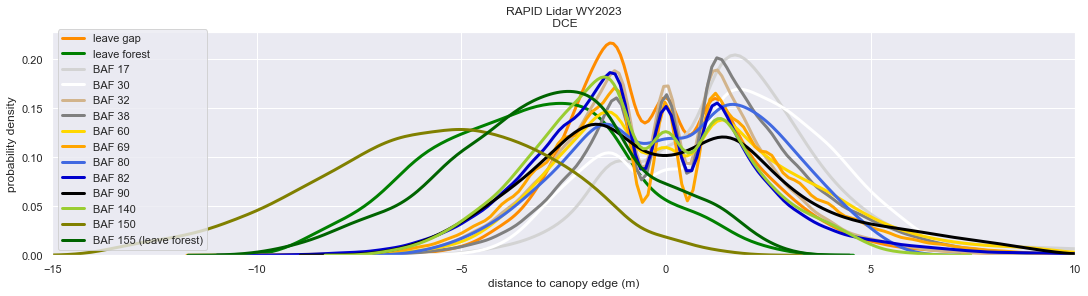

In [17]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), color='lightgrey', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), color='white', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023\n DCE')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-15,10)

plt.legend()
plt.show()

But, now we want to color them by % canopy cover

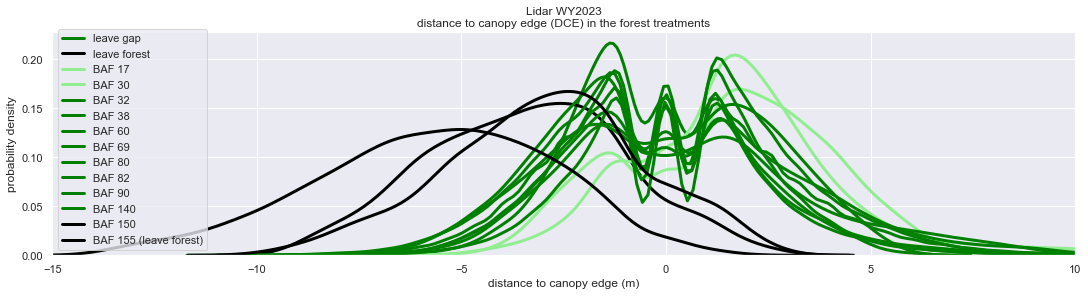

In [18]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

colorlow = 'lightgreen'
colormed = 'green'
colorhigh = 'black'

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color=colormed, label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color=colorhigh, label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), color=colorlow, label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), color=colorlow, label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color=colormed, label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color=colormed, label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color=colormed, label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color=colormed, label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color=colormed, label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color=colormed, label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color=colormed, label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color=colormed, label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color=colorhigh, label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color=colorhigh, label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('Lidar WY2023\ndistance to canopy edge (DCE) in the forest treatments')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-15,10)

plt.legend()
plt.show()

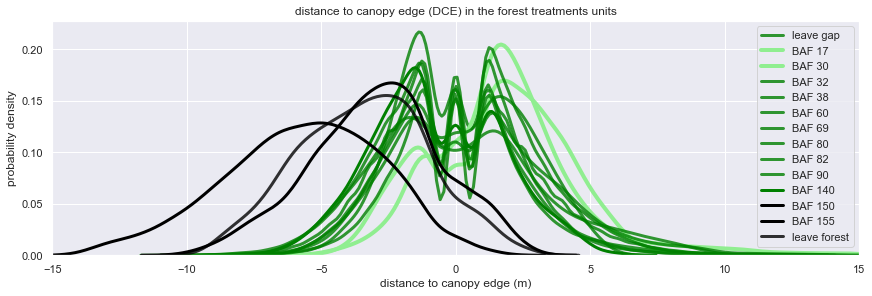

In [91]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(12,4), constrained_layout = True)
alpha=0.7

colorlow = 'lightgreen'
colormed = 'green'
colorhigh = 'black'

alpha_num = 0.8

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color=colormed, label='leave gap', cumulative=False, linewidth=3, alpha=alpha_num)

sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), color=colorlow, label='BAF 17', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), color=colorlow, label='BAF 30', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color=colormed, label='BAF 32', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color=colormed, label='BAF 38', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color=colormed, label='BAF 60', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color=colormed, label='BAF 69', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color=colormed, label='BAF 80', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color=colormed, label='BAF 82', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color=colormed, label='BAF 90', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color=colormed, label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color=colorhigh, label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color=colorhigh, label='BAF 155', cumulative=False, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color=colorhigh, label='leave forest', cumulative=False, linewidth=3, alpha=alpha_num)

# # add veriticle lines for the DCE groups 
# plt.axvline(x=8, color='grey', linestyle='--', linewidth=3)
# plt.axvline(x=2, color='grey', linestyle='--', linewidth=3)
# plt.axvline(x=-2, color='grey', linestyle='--', linewidth=3)
# plt.axvline(x=-8, color='grey', linestyle='--', linewidth=3)

# labels
plt.title('distance to canopy edge (DCE) in the forest treatments units')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-15,15)

plt.legend(loc='upper right')
plt.show()

# Calculate the % Canopy Cover Metric

Let's go one baf at a time.

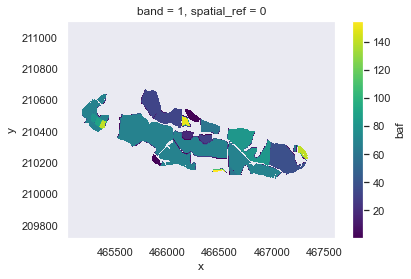

In [20]:
ds['baf'].plot()

In [21]:
# Define the canopy cover threshold
canopy_threshold = 2

# Determine the canopy grid cells
canopy_mask = ds['chmws_rapid'] > canopy_threshold

# Calculate the total number of canopy grid cells in the forest treatment area
baf_new_value = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == baf_new_value)
total_canopy_cells = np.sum(canopy_mask * treatment_area)

# Calculate the total number of grid cells in the forest treatment area
total_treatment_cells = np.sum(treatment_area)

# Calculate the percentage of canopy cover
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

print(f'Percentage of canopy cover in the forest treatment area: {percentage_canopy_cover.values}%')

Percentage of canopy cover in the forest treatment area: 64.73274827003479%


I created the code below, which is used in the large loop to do this for all the BAF. Compare the values to make sure everything is correct. 

In [22]:
BAF = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 2
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 17
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 32
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')


Percentage of canopy cover in the forest treatment area for BAF 1: 64.73274827003479%
Percentage of canopy cover in the forest treatment area for BAF 2: 95.09132504463196%
Percentage of canopy cover in the forest treatment area for BAF 17: 29.30718958377838%
Percentage of canopy cover in the forest treatment area for BAF 32: 59.14224982261658%


In [23]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [24]:
df.dtypes

BAF                 int64
canopy_cover_2m    object
canopy_cover_3m    object
canopy_cover_4m    object
dtype: object

In [25]:
# change the type to integer for all columns 
df = df.astype(int)

In [26]:
df.canopy_cover_2m.dtype

dtype('int32')

In [27]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [28]:
df

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,1,64,55,47
1,2,95,93,91
2,17,29,23,18
3,30,34,30,27
4,32,59,53,49
5,38,45,42,39
6,60,51,48,45
7,69,56,53,50
8,80,53,47,44
9,82,65,62,58


Text(0.5, 1.0, 'threshold for 2m')

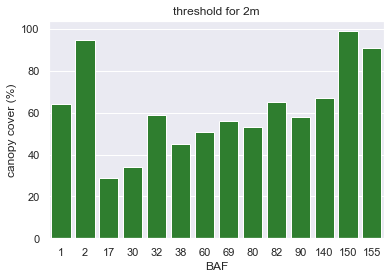

In [41]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [30]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

In [31]:
df2.head()

,BAF,threshold,canopy_cover
0,1,canopy_cover_2m,64
1,2,canopy_cover_2m,95
2,17,canopy_cover_2m,29
3,30,canopy_cover_2m,34
4,32,canopy_cover_2m,59


Text(0.5, 1.0, 'percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

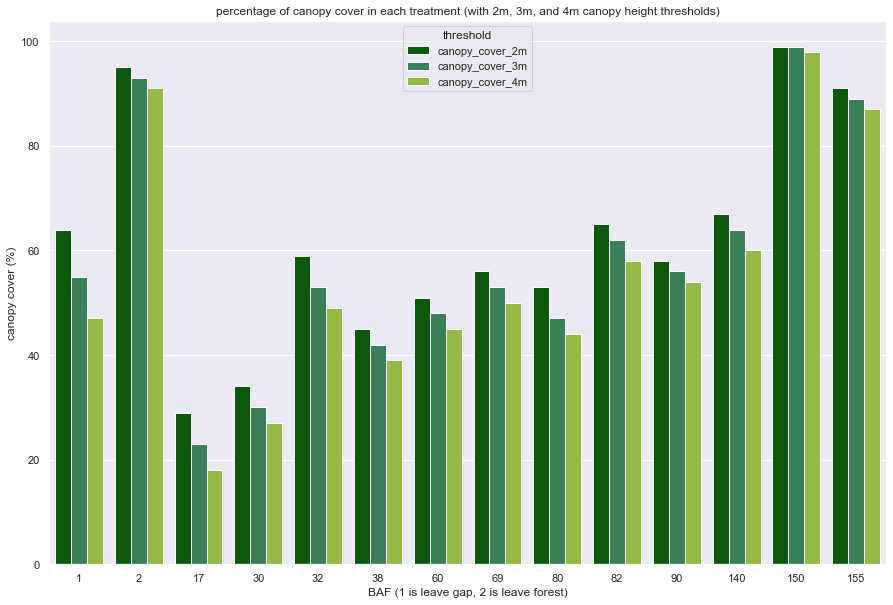

In [32]:
# increase figure size
fig = plt.figure(figsize=(15, 10))
color='forestgreen'
palette=['darkgreen', 'seagreen', 'yellowgreen']

# sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', color='green')

sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('canopy cover (%)')
plt.title('percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

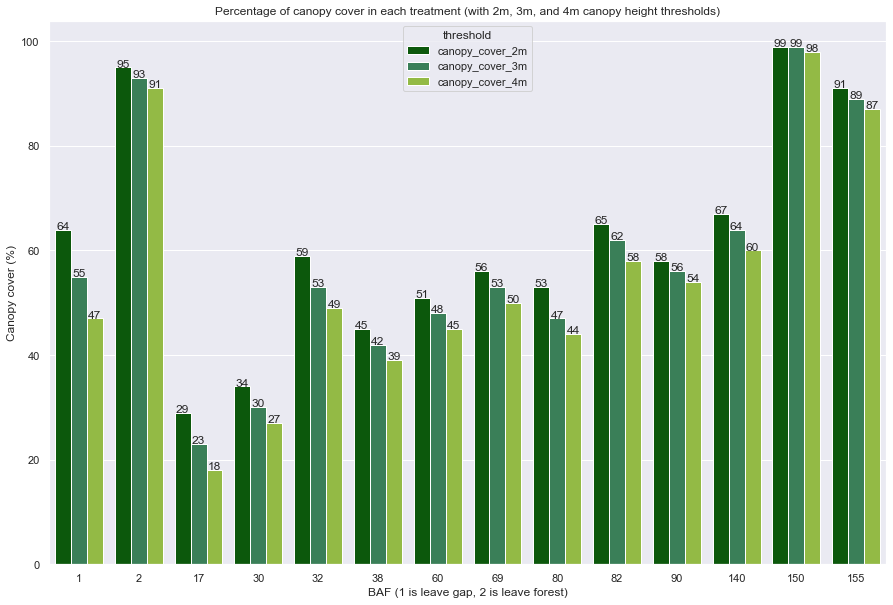

In [33]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

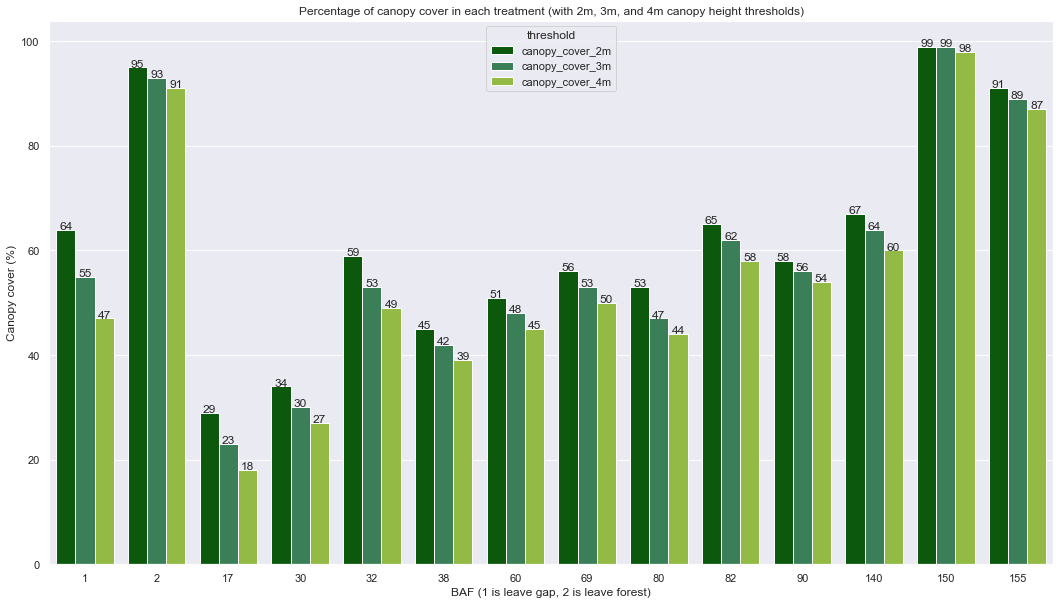

In [34]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

Now, let's try to fix the BAF 1 and 2 things

In [42]:
df

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,1,64,55,47
1,2,95,93,91
2,17,29,23,18
3,30,34,30,27
4,32,59,53,49
5,38,45,42,39
6,60,51,48,45
7,69,56,53,50
8,80,53,47,44
9,82,65,62,58


In [43]:
df_fix = df.copy(deep=True)

In [47]:
# change the value of df_fix['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df_fix['BAF'] = df_fix['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df_fix = df_fix.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df_fix.head()

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,leave gap,64,55,47
2,BAF 17,29,23,18
3,BAF 30,34,30,27
4,BAF 32,59,53,49
5,BAF 38,45,42,39


Text(0.5, 0, 'treatment units')

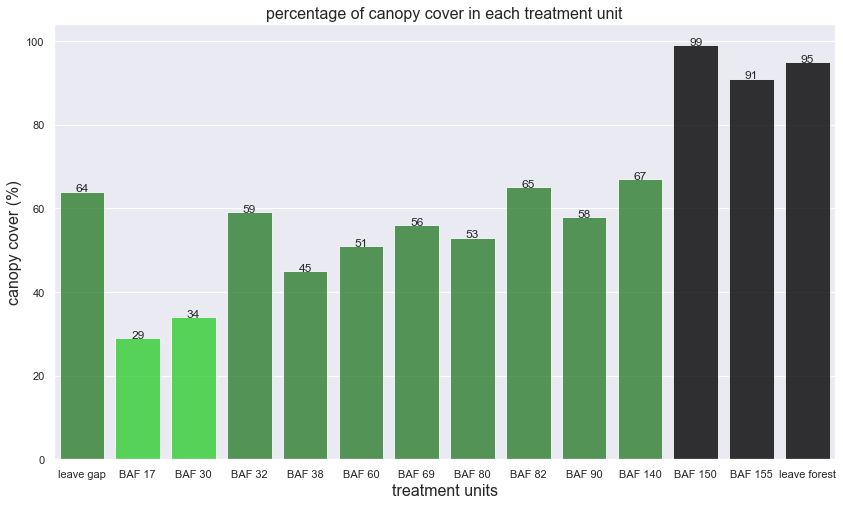

In [85]:
# Now, plot these to compare. 
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(data=df_fix, x='BAF', y='canopy_cover_2m', color='forestgreen', alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df_fix['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

plt.title('percentage of canopy cover in each treatment unit', fontsize=16)
# plt.ylabel('canopy cover (%)\n2m canopy height threshold', fontsize=16)
plt.ylabel('canopy cover (%)', fontsize=16)

plt.xlabel('treatment units', fontsize=16)

Text(0.5, 0, 'treatment units')

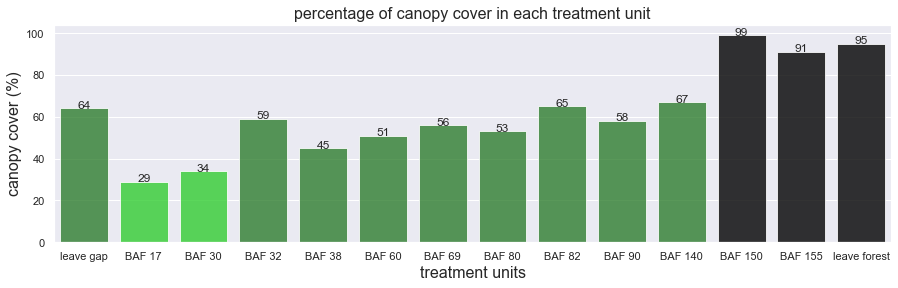

In [102]:
# Now, plot these to compare. 
fig = plt.figure(figsize=(15, 4))

ax = sns.barplot(data=df_fix, x='BAF', y='canopy_cover_2m', color='forestgreen', alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df_fix['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

plt.title('percentage of canopy cover in each treatment unit', fontsize=16)
# plt.ylabel('canopy cover (%)\n2m canopy height threshold', fontsize=16)
plt.ylabel('canopy cover (%)', fontsize=16)

plt.xlabel('treatment units', fontsize=16)

Now, plot this next to the DCE figure so that everything is scaled together. 

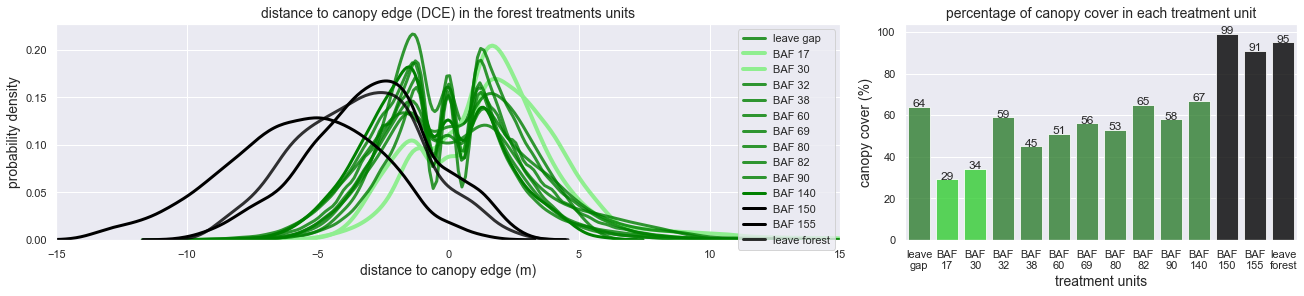

In [101]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(18,4), constrained_layout = True,
                         gridspec_kw={'width_ratios': [2, 1]})

colorlow = 'lightgreen';colormed = 'green';colorhigh = 'black'
alpha_num = 0.8
fontsize_num = 14

# first plot _________________________________________________________
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color=colormed, label='leave gap', cumulative=False, linewidth=3, alpha=alpha_num)

sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color=colorlow, label='BAF 17', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color=colorlow, label='BAF 30', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color=colormed, label='BAF 32', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color=colormed, label='BAF 38', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color=colormed, label='BAF 60', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color=colormed, label='BAF 69', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color=colormed, label='BAF 80', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color=colormed, label='BAF 82', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color=colormed, label='BAF 90', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color=colormed, label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color=colorhigh, label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color=colorhigh, label='BAF 155', cumulative=False, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color=colorhigh, label='leave forest', cumulative=False, linewidth=3, alpha=alpha_num)

# labels
axes[0].set_title('distance to canopy edge (DCE) in the forest treatments units', fontsize=fontsize_num)
axes[0].set_xlabel('distance to canopy edge (m)', fontsize=fontsize_num)
axes[0].set_ylabel('probability density', fontsize=fontsize_num)
axes[0].set_xlim(-15,15)

axes[0].legend(loc='upper right')

# second plot _________________________________________________________
ax = sns.barplot(data=df_fix, x='BAF', y='canopy_cover_2m', color='forestgreen', ax=axes[1], alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df_fix['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

axes[1].set_title('percentage of canopy cover in each treatment unit', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_xlabel('treatment units', fontsize=fontsize_num)

# adjust the xtick marks in the second plot to be more readable
axes[1].set_xticklabels(['leave\ngap', 'BAF\n17', 'BAF\n30', 'BAF\n32', 'BAF\n38', 'BAF\n60', 'BAF\n69', 'BAF\n80', 'BAF\n82', 'BAF\n90', 'BAF\n140', 'BAF\n150', 'BAF\n155', 'leave\nforest'])
plt.show()


## Now, we want to get % canopy cover for before the treatments too

In [35]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [36]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

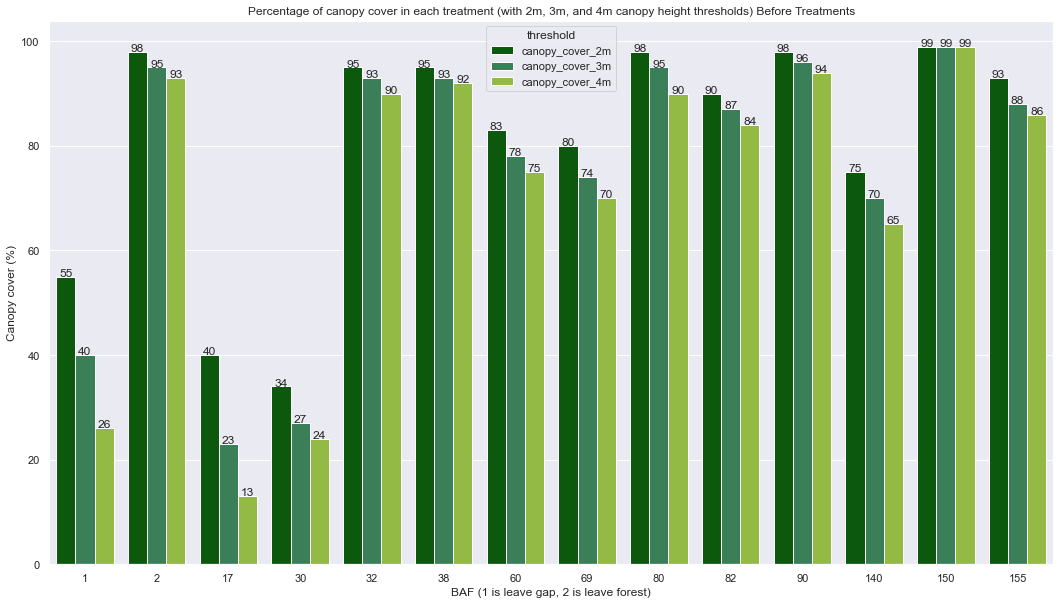

In [37]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

Now, merge the df2 and df2_pre with only the 2m threshold to then compare on one plot

In [122]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [155]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'WY2021 before treatments'
df2_pos['treatment'] = 'WY2023 after treatments'

df2_all = pd.concat([df2_pre, df2_pos])

# drop the threshold column
df2_all = df2_all.drop(columns=['threshold'])
df2_all.reset_index(drop=True, inplace=True)
df2_all_fix = df2_all.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 15])


df2_all_fix['BAF'] = df2_all_fix['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155',
                                       1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

df2_all_fix.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_20132\4229083290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'WY2023 after treatments'


,BAF,canopy_cover,treatment
0,leave gap,55,WY2021 before treatments
2,BAF 17,40,WY2021 before treatments
3,BAF 30,34,WY2021 before treatments
4,BAF 32,95,WY2021 before treatments
5,BAF 38,95,WY2021 before treatments


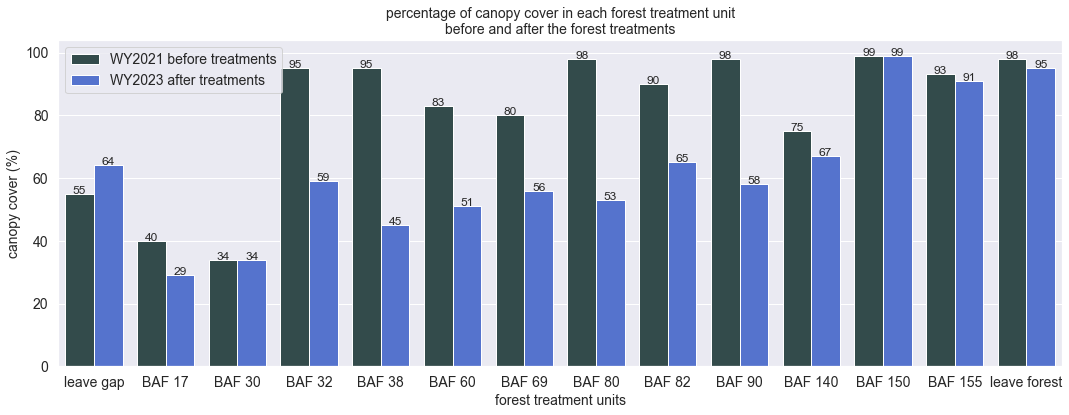

In [162]:
fig = plt.figure(figsize=(18, 6))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

plt.show()

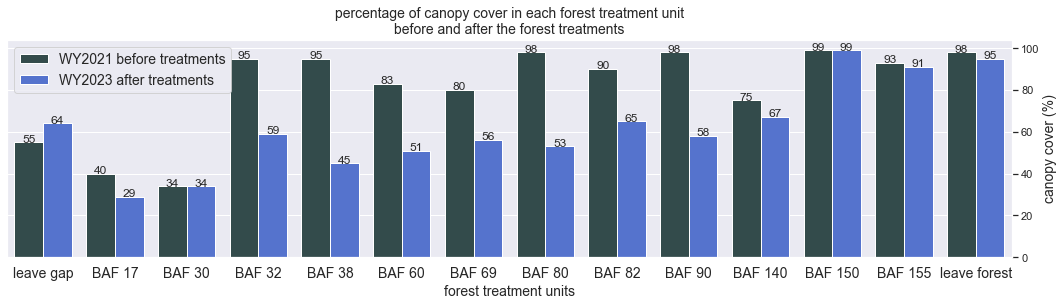

In [160]:
fig = plt.figure(figsize=(18, 4))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.show()